In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import timeit
from ipynb.fs.full.utils import get_faces, get_person_num, show_sample_faces, split_train_test,get_stats

Showing sample faces


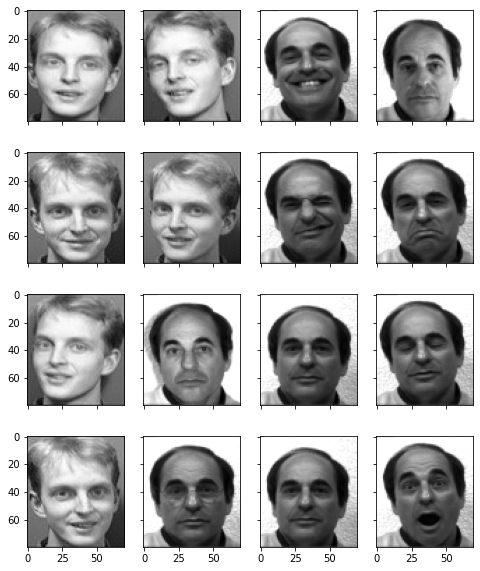

In [5]:
faces = get_faces(zipfile_path="./Grp13Dataset.zip")
show_sample_faces(faces=faces)

In [6]:
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

Face image shape: (80, 70)


In [7]:
classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of images:", len(faces))

Number of classes: 41
Number of images: 410


In [8]:
facematrix = []
facelabel = []

In [9]:
training_set, testing_set = split_train_test(zipfilepath="./Grp13Dataset.zip")

In [10]:
start = timeit.default_timer()

In [11]:
for key, val in training_set.items():
    # fig 1
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])

facematrix = np.array(facematrix)

In [12]:
pca = PCA().fit(facematrix)

In [14]:
n_components = int(input())
eigenfaces = pca.components_[:n_components]

40


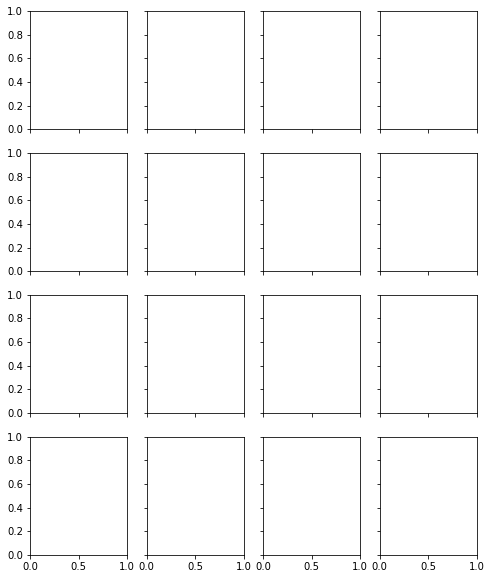

In [15]:
fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(8, 10))

In [17]:
for i in range(16):
    if(i<len(eigenfaces)):
        break
    axes[i % 4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
print("Showing the eigenfaces")
plt.show()

Showing the eigenfaces


In [18]:
# eqn 4
weights = eigenfaces @ (facematrix - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

Shape of the weight matrix: (40, 328)


In [19]:
def get_best_match(filename):
    query = faces[filename].reshape(1, -1)
    # eqn 22
    query_weight = eigenfaces @ (query - pca.mean_).T
    euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
    best_match = np.argmin(euclidean_distance)
    #print("Best match %s with Euclidean distance %f" %  (facelabel[best_match], euclidean_distance[best_match]))

    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 6))
    person_num, img_num = get_person_num(filename=filename)

    axes[0].imshow(query.reshape(faceshape), cmap="gray")
    axes[0].set_title("Query - Person " + str(person_num))
    axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
    axes[1].set_title("Best match - Person " + str((best_match//8) + 1))
    #plt.show()
    # uncomment the above line to see individual results of testing faces
    return (((best_match//8) + 1), person_num)

In [20]:
stop = timeit.default_timer()

C:\Users\devik\AppData\Local\Temp/ipykernel_20192/2206531659.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 6))


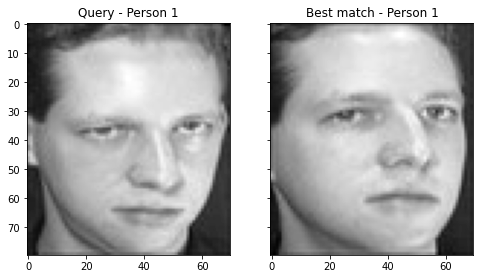

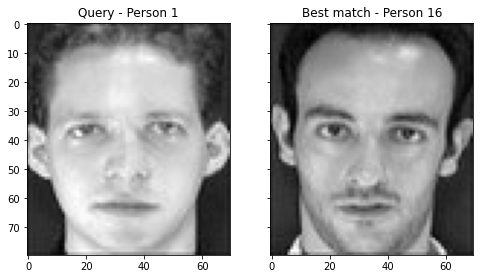

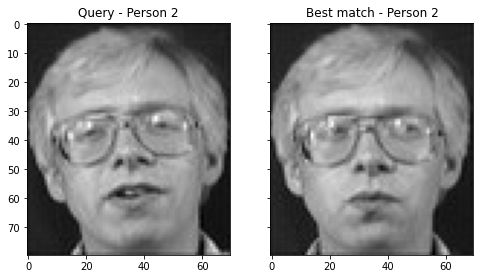

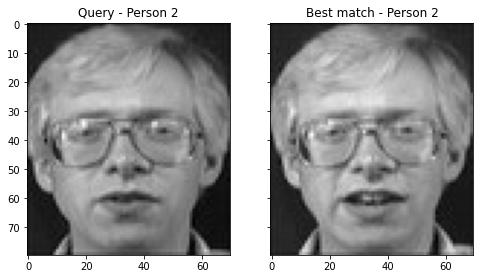

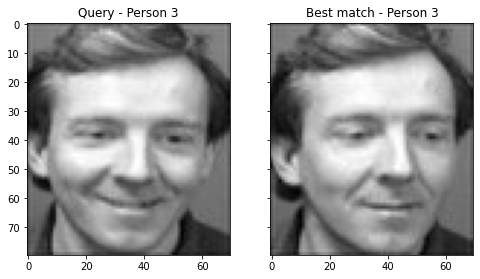

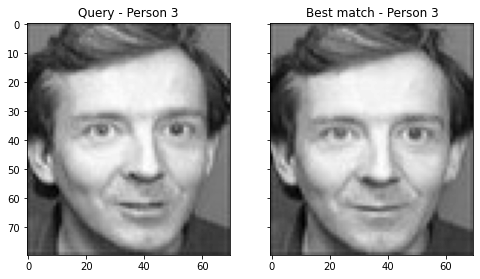

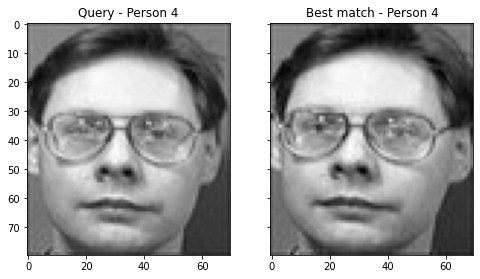

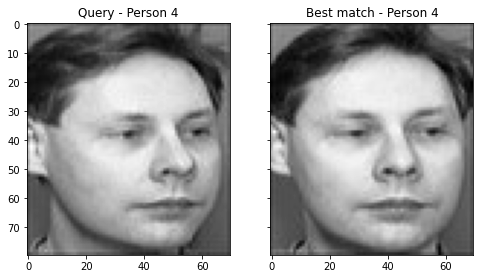

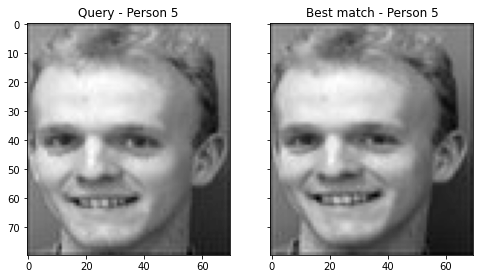

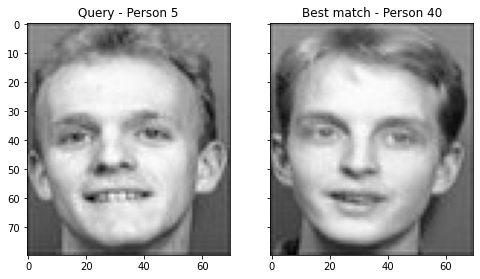

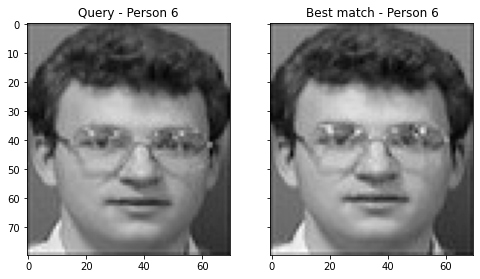

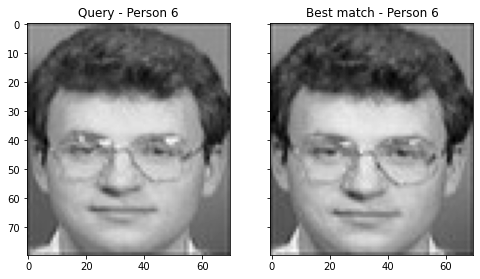

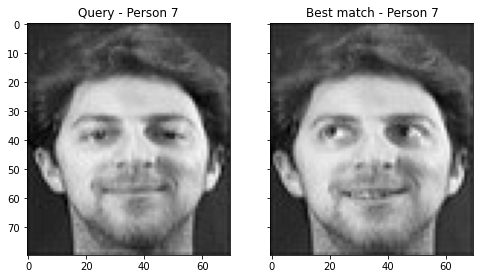

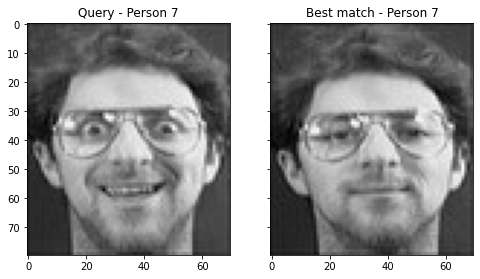

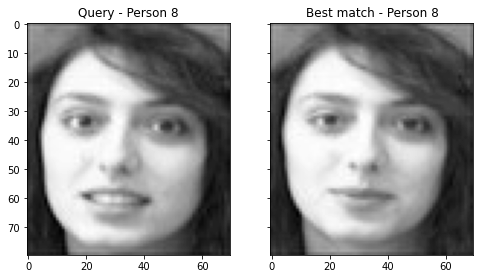

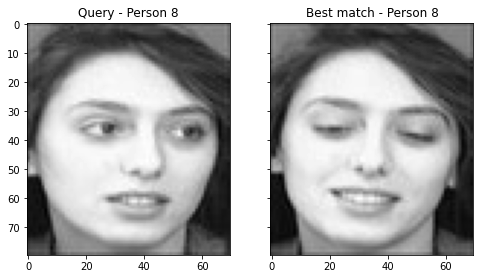

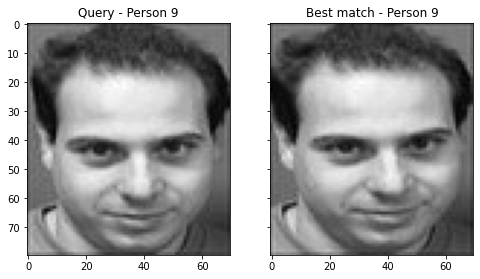

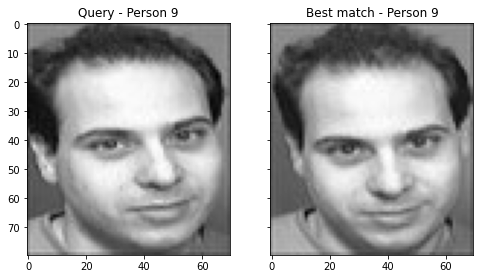

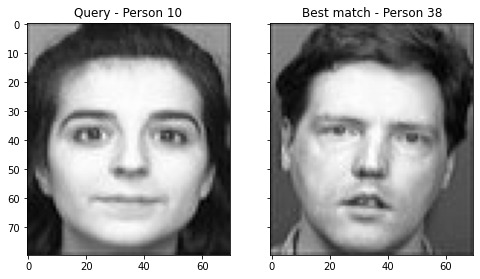

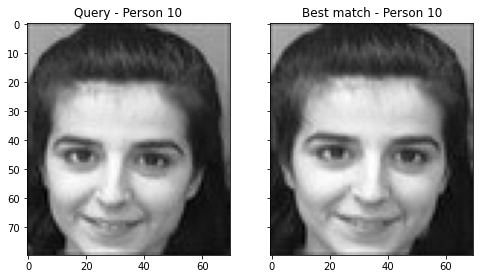

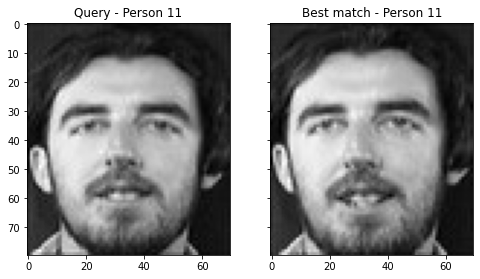

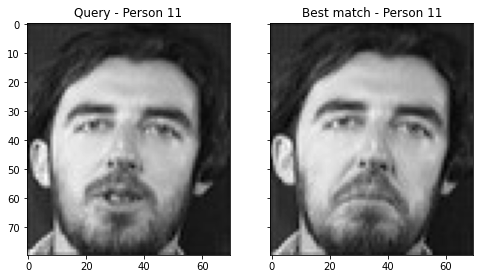

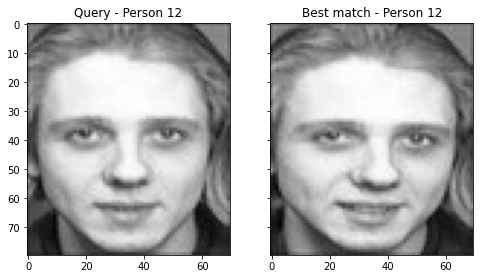

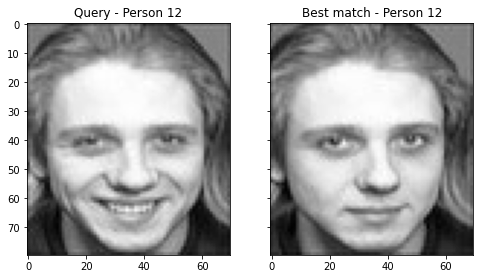

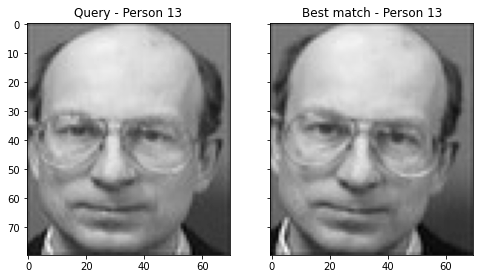

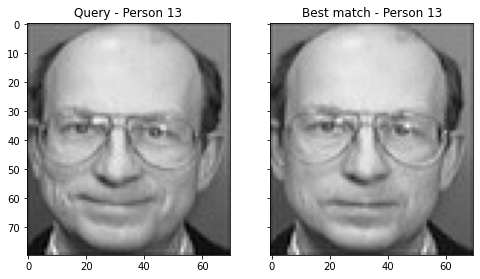

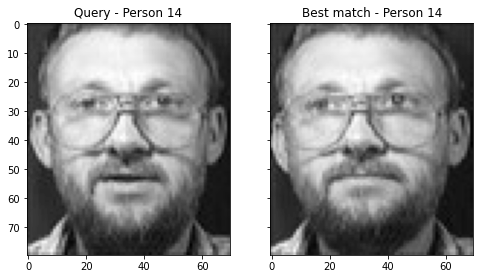

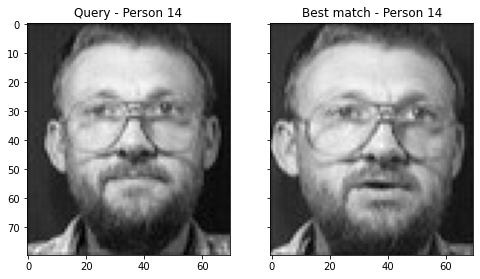

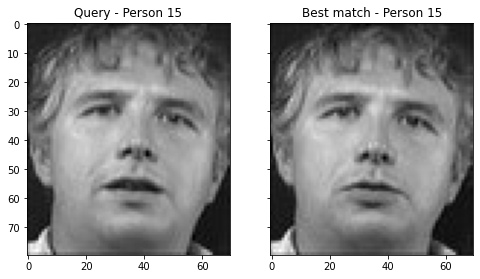

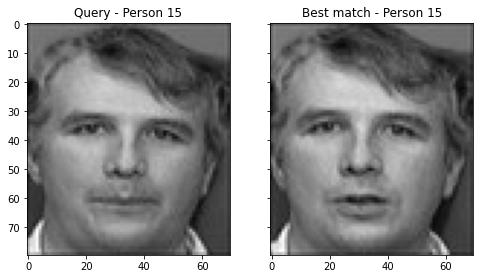

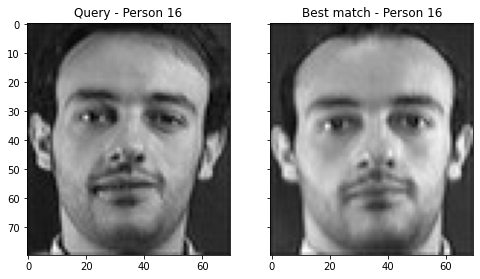

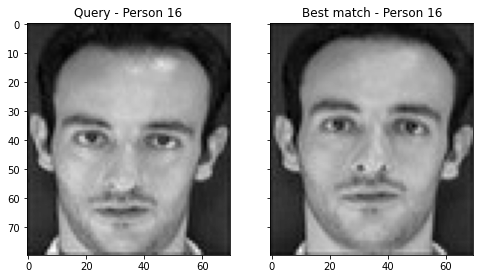

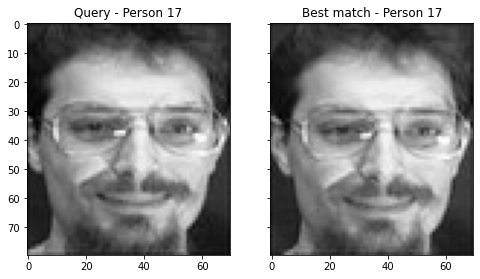

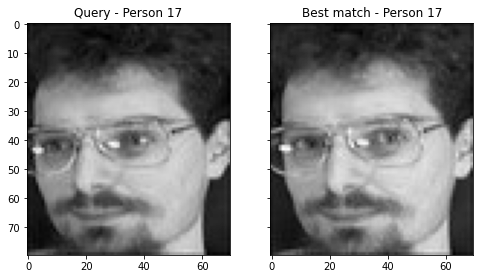

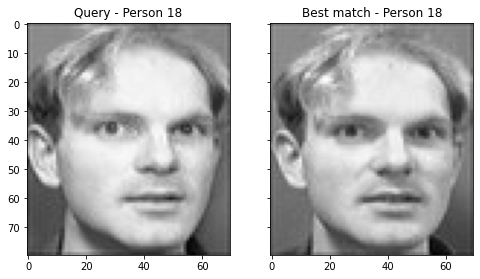

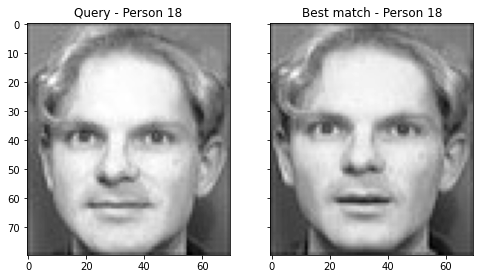

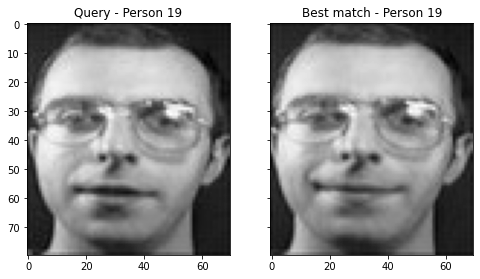

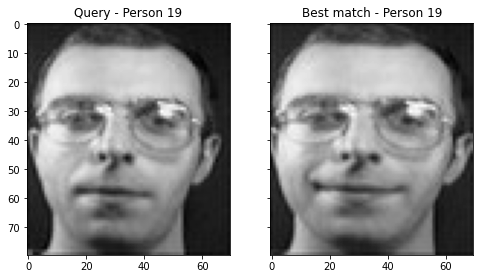

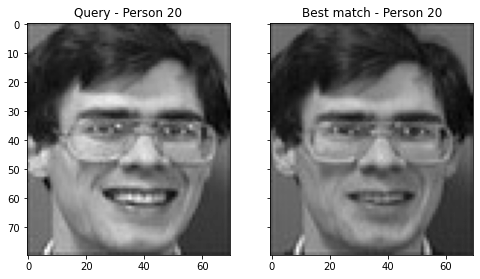

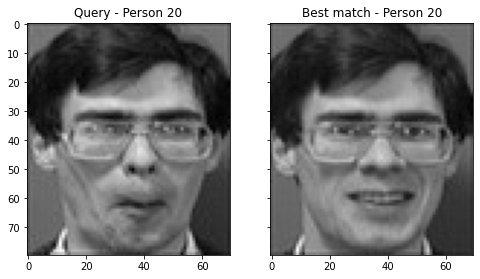

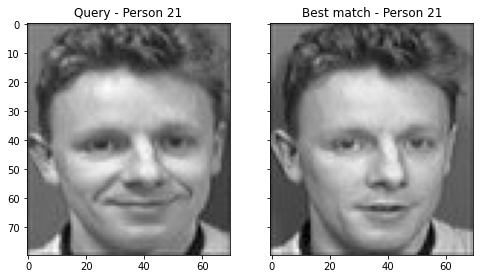

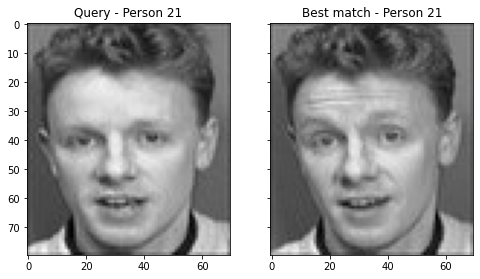

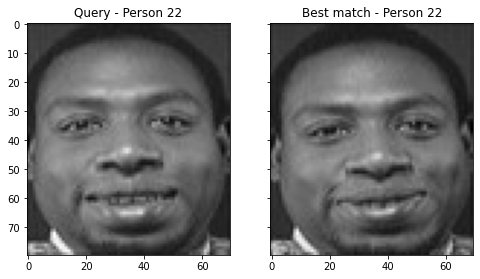

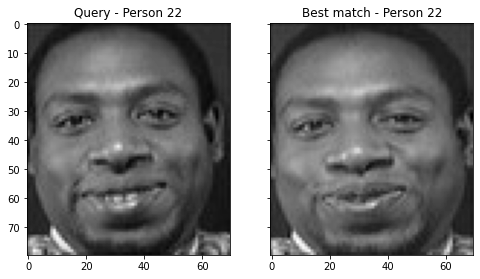

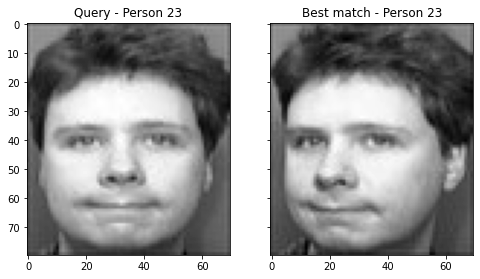

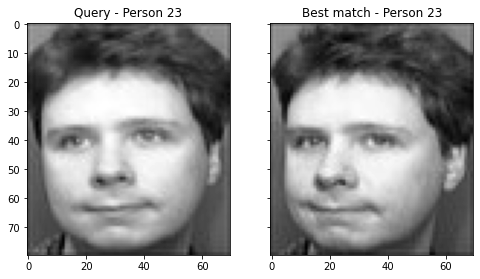

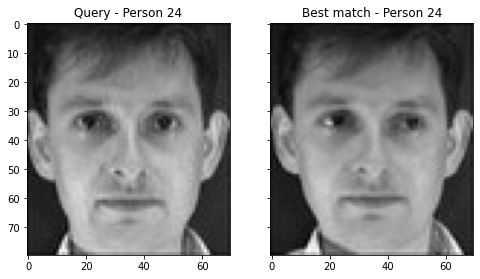

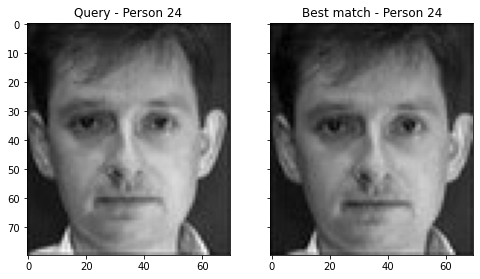

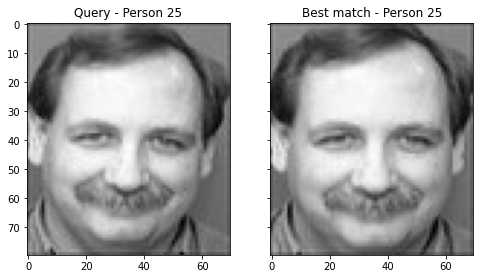

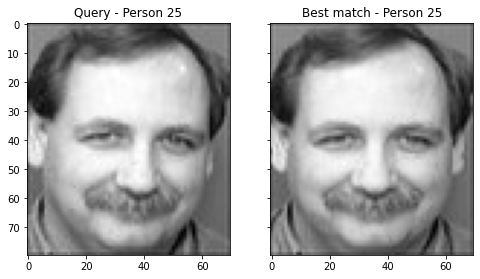

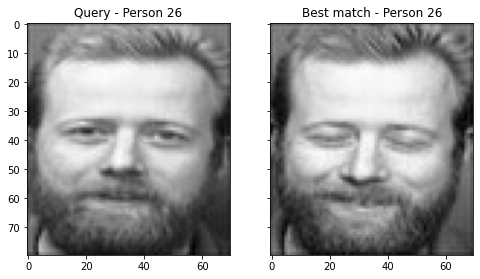

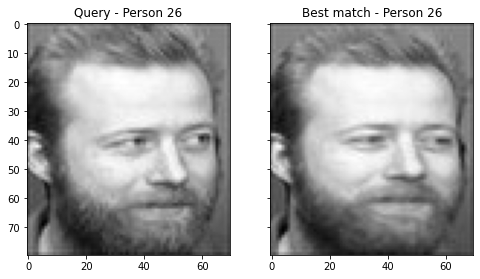

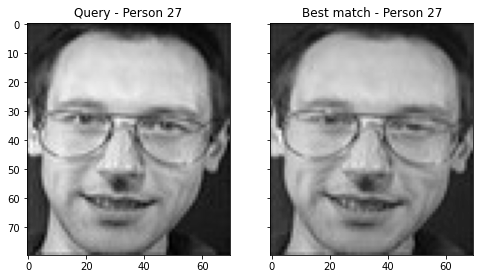

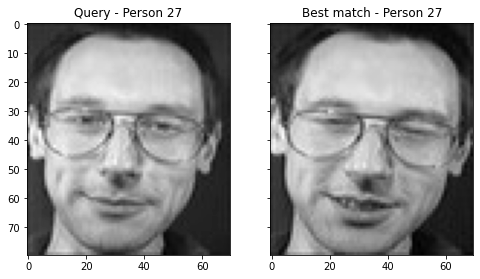

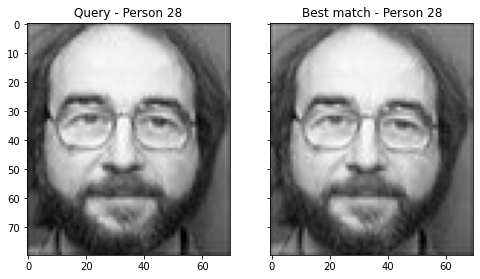

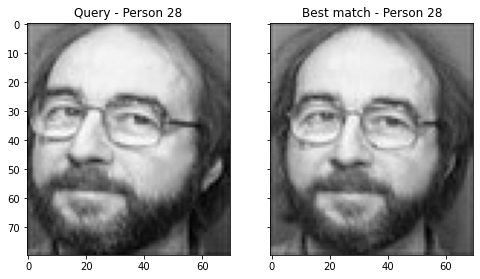

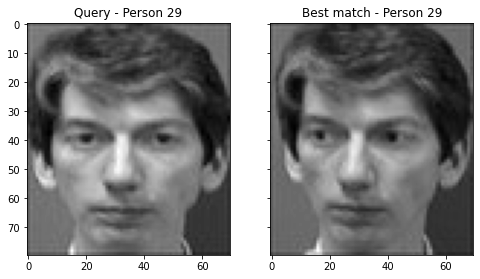

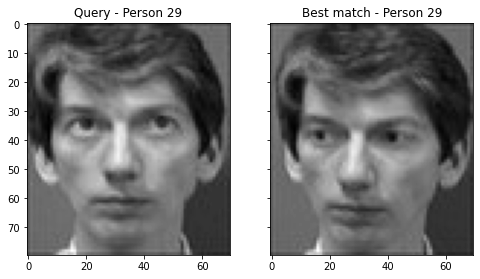

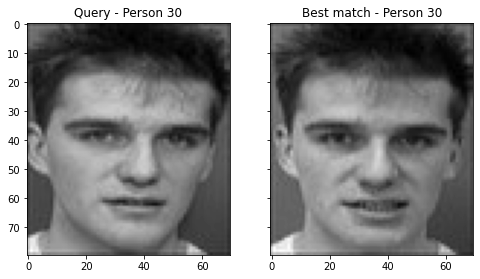

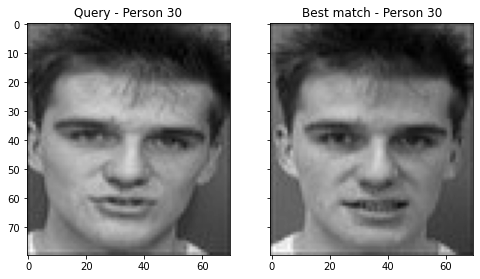

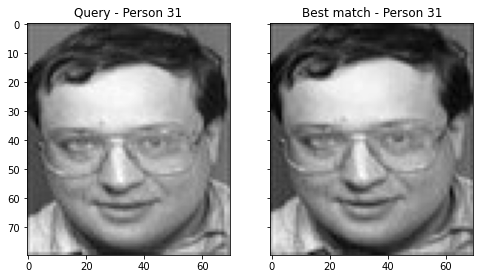

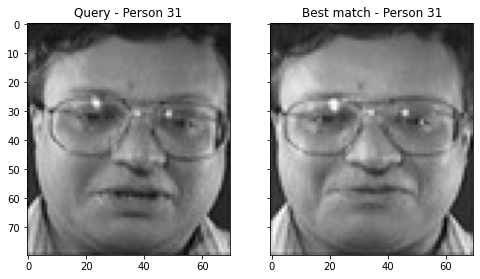

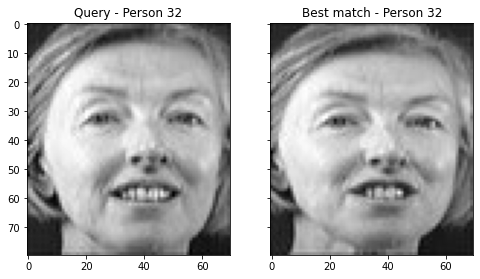

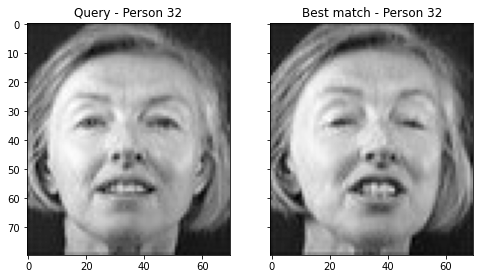

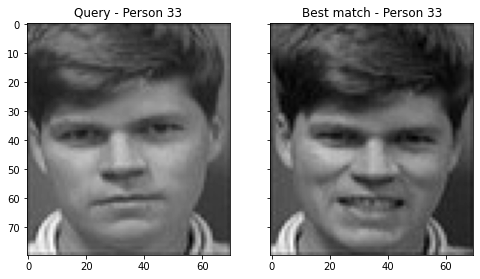

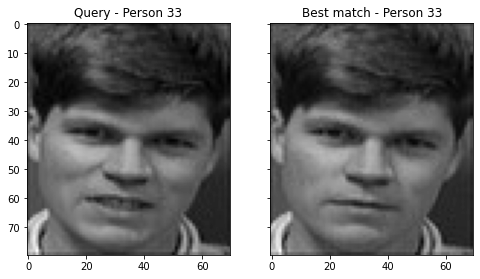

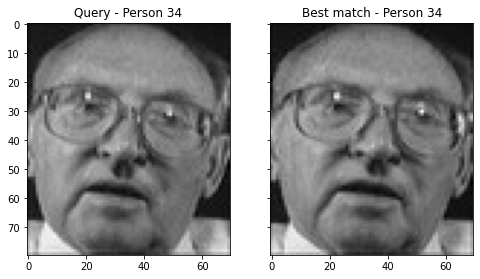

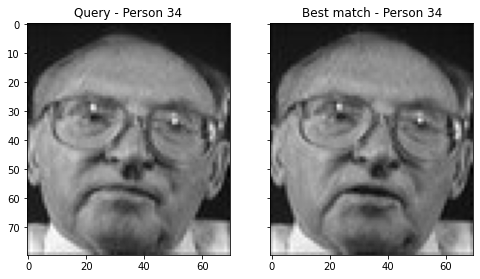

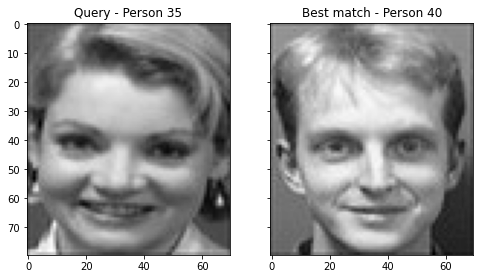

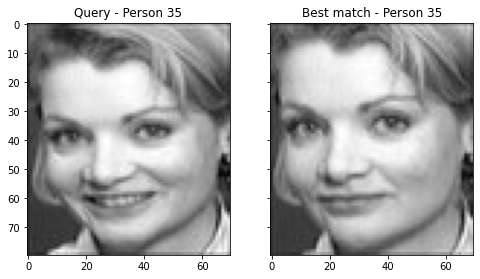

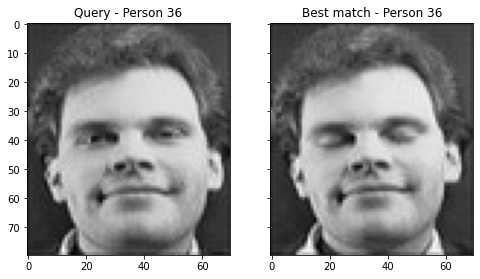

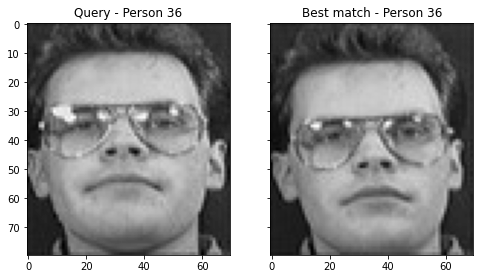

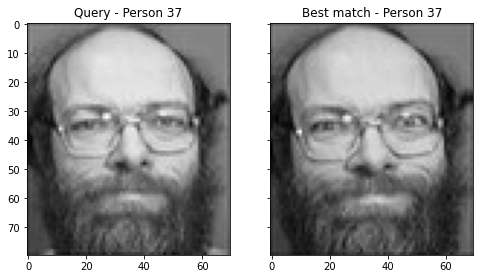

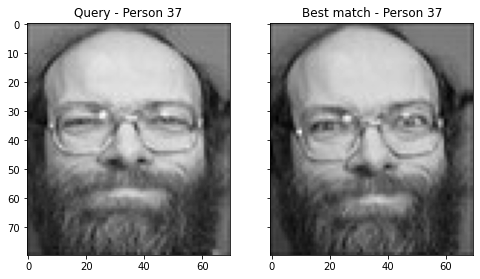

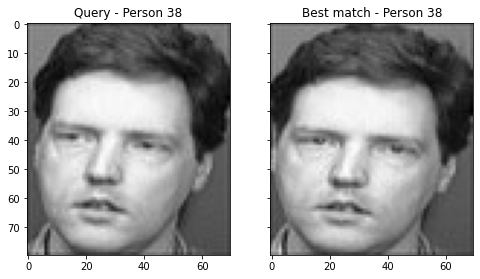

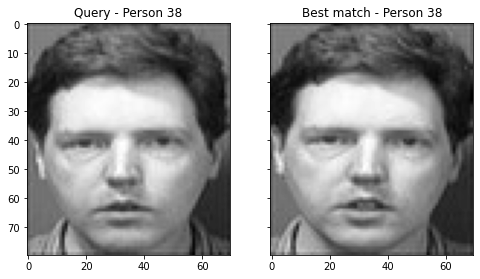

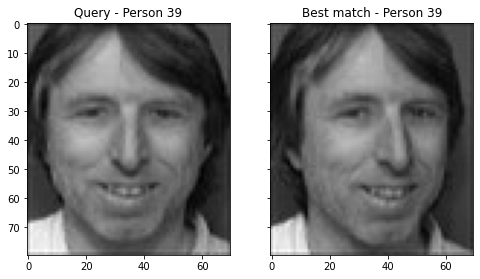

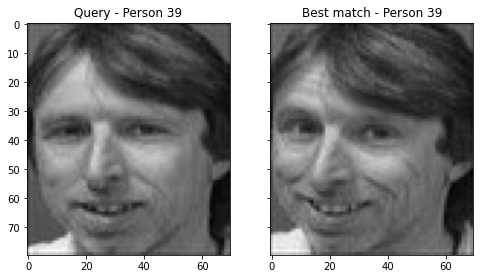

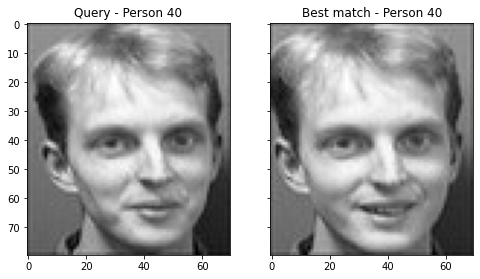

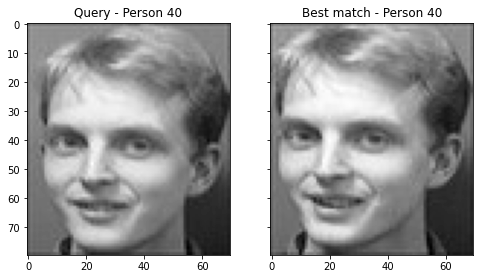

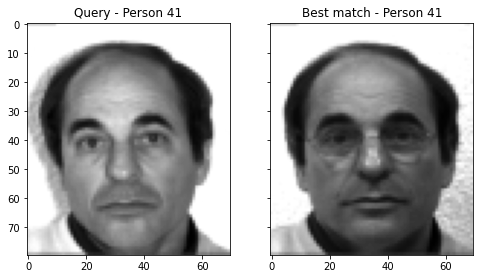

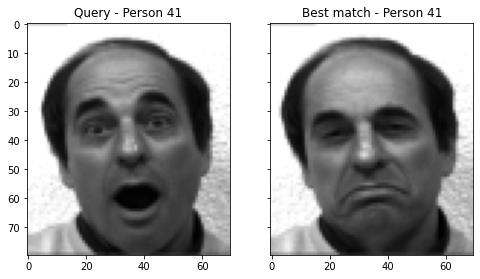

In [21]:
correct_pred = 0
wrong_pred = 0
total_pred = 0
for key, val in testing_set.items():       
    predicted, actual = get_best_match(filename=key)
    total_pred += 1
    if predicted == actual:
        correct_pred += 1
    else:
        wrong_pred += 1

In [22]:
Correct_Predic, Wrong_Predic, Accuracy = get_stats(correct_pred,wrong_pred,total_pred)
print(f"Correct prediction: ",Correct_Predic)
print(f"Wrong prediction: ",Wrong_Predic)

print(f"Accuracy: ",Accuracy,"%")
print(f"Time Taken: ",round(stop-start,3),"s")

Correct prediction:  0.951
Wrong prediction:  0.049
Accuracy:  95.122 %
Time Taken:  107.596 s
